## Data Preprocessing

In the previous session, you successfully acquired and prepared a subset of the ESS10 data 

Keep in minde we aim to the following hypothesis:

> **Centrist individuals exhibit lower levels of affective polarization.**

Today, you will clean this dataset to make it analysis-ready. This involves:

1. Loading the subset data you created last time
2. Filtering observations (focusing on France)
3. Recoding variables for analysis
4. Creating relevant variables for the analysis
5. Saving the cleaned dataset

### Tips

- You should adapt code from previous [notebooks](https://github.com/mickaeltemporao/materials/tree/main), such as:
    - `05-data-exploration-rows.ipynb`
    - `06-data-management-existing-values.ipynb`


## Loading the Data

We have prepared a helper function in the `code/preprocess.py` module that will load your subset data. If the subset file doesn't exist, it will recreate it from the raw ESS data.

In [5]:
# Import necessary libraries
import sys
import pandas as pd

# Adding the code directory to path
sys.path.append('../code')  

# Import the preprocessing module
from preprocess import subset

In [12]:
# Load the subset data using our helper function
df = subset()
df.sample(5)

,cntry,clsprty,lrscale,polintr,prtclffr,prtdgcl,prtvtefr,vote,trstplt,trstprt,stfgov,stfdem
37318,SK,2,5,4,NaN,6,NaN,1,0,0,8,5
20601,IE,2,3,3,NaN,6,NaN,1,2,2,4,8
17061,GR,2,5,4,NaN,6,NaN,1,3,3,3,3
11884,FR,2,88,4,66.0,6,66.0,2,0,0,5,5
90,BE,2,6,3,NaN,6,NaN,3,4,4,5,4


In [7]:
# Quick sanity check before we get started
df.describe()

,clsprty,lrscale,polintr,prtclffr,prtdgcl,prtvtefr,vote,trstplt,trstprt,stfgov,stfdem
count,37611.000000,37611.000000,37611.000000,1977.000000,37611.000000,1977.000000,37611.000000,37611.000000,37611.000000,37611.000000,37611.000000
mean,1.727367,16.444338,2.749329,43.245321,4.503417,41.382398,1.425859,4.803621,5.033714,6.405440,7.193082
std,1.077339,27.903590,0.952343,29.115156,1.972170,30.683813,0.922063,9.834460,10.931258,12.515845,12.621552
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,7.000000,2.000000,7.000000,1.000000,2.000000,2.000000,3.000000,4.000000
50%,2.000000,5.000000,3.000000,66.000000,6.000000,66.000000,1.000000,4.000000,4.000000,5.000000,6.000000
75%,2.000000,8.000000,3.000000,66.000000,6.000000,66.000000,2.000000,6.000000,6.000000,7.000000,7.000000
max,9.000000,99.000000,9.000000,88.000000,9.000000,88.000000,9.000000,99.000000,99.000000,99.000000,99.000000


# Let's Start!
## Filtering French Observations

Since some variables are country-specific, let's filter our dataset to focus on French respondents.

**Task:**
1. Filter the dataset to include only respondents from France (`country == 'FR'`)
2. Create a new dataframe called `df_france`
3. Drop the `cntry` column
4. Display the first few rows

In [15]:
# Your code here:

mask = df["cntry"] == "FR"
df_france = df[mask]

df_france["cntry"].value_counts()

cntry
FR    1977
Name: count, dtype: int64

## Filtering Relevant Observations

Before we can analyze the data, we need to understand how the variables are coded. 

If you check the codebook, we see that most variables have values that are not applicable to our analysis (66, 77, 88, ...). 
For now, we will simply remove irrelevant observations.

> The codebook has been automatically downloaded in `data/raw/ESS10 codebook.html`

**Task:**
1. Filter each variable to include only relevant observations
2. Check the values of the remaining observations
2. Display the first few rows of the dataset

In [17]:
df_france.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1977 entries, 11177 to 13153
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cntry     1977 non-null   object 
 1   clsprty   1977 non-null   int64  
 2   lrscale   1977 non-null   int64  
 3   polintr   1977 non-null   int64  
 4   prtclffr  1977 non-null   float64
 5   prtdgcl   1977 non-null   int64  
 6   prtvtefr  1977 non-null   float64
 7   vote      1977 non-null   int64  
 8   trstplt   1977 non-null   int64  
 9   trstprt   1977 non-null   int64  
 10  stfgov    1977 non-null   int64  
 11  stfdem    1977 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 200.8+ KB


In [ ]:
# Your code here (you can create multiple code blocks)

# Filtering values from clsprty :
mask = df_france["clsprty"] <= 2
df_france = df_france[mask]

# Filtering values from lrscale :
mask = df_france["lrscale"] <= 10
df_france = df_france[mask]

# Filtering values from polintr :
mask = df_france["polintr"] <= 4
df_france = df_france[mask]

# Filtering values from prtclffr :
mask = df_france["prtclffr"] <= 11
df_france = df_france[mask]

# Filtering values from prtdgcl :
mask = df_france["prtdgcl"] <= 4
df_france = df_france[mask]

# Filtering values from prtvtefr :
mask = df_france["prtvtefr"] <= 11
df_france = df_france[mask]

# Filtering values from vote :
mask = df_france["vote"] <= 2
df_france = df_france[mask]

# Filtering values from trstplt :
mask = df_france["trstplt"] <= 10
df_france = df_france[mask]

# Filtering values from trstprt :
mask = df_france["trstprt"] <= 10
df_france = df_france[mask]

# Filtering values from stfgov :
mask = df_france["stfgov"] <= 10
df_france = df_france[mask]

# Filtering values from stfdem :
mask = df_france["stfdem"] <= 10
df_france = df_france[mask]

# I could have done it with the .loc method

In [20]:
df_france.info()

<class 'pandas.core.frame.DataFrame'>
Index: 489 entries, 11178 to 13153
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cntry     489 non-null    object 
 1   clsprty   489 non-null    int64  
 2   lrscale   489 non-null    int64  
 3   polintr   489 non-null    int64  
 4   prtclffr  489 non-null    float64
 5   prtdgcl   489 non-null    int64  
 6   prtvtefr  489 non-null    float64
 7   vote      489 non-null    int64  
 8   trstplt   489 non-null    int64  
 9   trstprt   489 non-null    int64  
 10  stfgov    489 non-null    int64  
 11  stfdem    489 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 49.7+ KB


In [21]:
df_france.head()

,cntry,clsprty,lrscale,polintr,prtclffr,prtdgcl,prtvtefr,vote,trstplt,trstprt,stfgov,stfdem
11178,FR,1,0,2,4.0,3,6.0,1,5,5,5,5
11182,FR,1,4,3,3.0,1,3.0,1,5,5,4,4
11183,FR,1,9,1,9.0,3,9.0,1,7,7,3,4
11191,FR,1,5,3,5.0,4,5.0,1,0,0,5,0
11194,FR,1,5,1,6.0,2,6.0,1,4,3,6,7


## Creating the Centrist Variable 

For our hypothesis, we need to identify "centrist" individuals. 
Therefore, we will should add a new variable capturing this concept into our data frame.

**Task:**
- Use the `lrscale` to create a centrism variable
- Add the new variable `centrism` to the data frame
- Check the distribution of the newly created variable


In [ ]:
# Your code here:
# Create the centrism variable


# Check the distribution



## Creating an Affective Scale?

For our hypothesis, we also need to build an affective evaluation scale.

Unfortunately, ... the ESS does not have direct out-party dislike or feeling thermometers toward parties.
Not having direct observations of what we are trying to test, is common when doing research. 

We need need to find a way around this by building a proxy that is close to our original concept.
One way to build such proxy is by creating an additive scale combining multiple variables of interest. 

That is, we could add variables together to build an "Affective Scale".

**Task:**
- Select some or all trust and satisfaction variables.
- Make sure they are coded in the same direction (higher = more positive evaluation).
- Combine them into an additive scale (sum or average).
- Create a new variable called `aff_eval` in the data frame.
- Check the distribution of aff_eval using summary statistics and a histogram.


<Axes: ylabel='Frequency'>

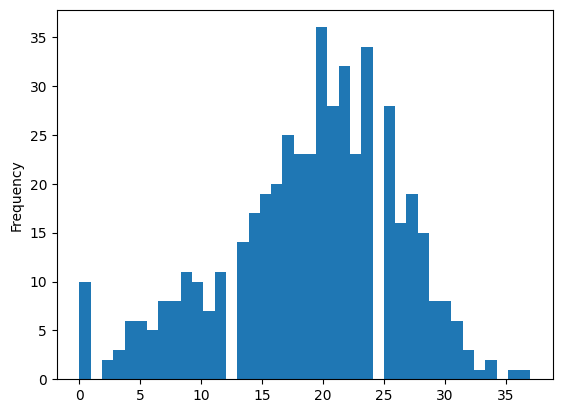

In [29]:
# Your code here:
# Create the aff_eval variable

ap_subset = ["trstplt",     # Trust in politicians
            "trstprt",      # Trust in political parties
            "stfgov",       # How satisfied with the national government
            "stfdem",       # How satisfied with the way democracy works in country
            ]

df_france["aff_eval"] = df_france[ap_subset].sum(axis=1)

# Check the distribution

df_france["aff_eval"].plot(kind="hist", bins=40)

## Exploratory Data Analysis

Now let's explore our cleaned data to understand the relationships between variables.

In [ ]:
# Summary statistics for key variables


In [ ]:
# Create crosstabs and plots to examine the relationships


## Saving the Final Dataset

Let's create our final analysis-ready dataset with the key variables for testing our hypothesis.

In [ ]:
# Save the final cleaned dataset
